In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
# Set the file paths to the CSVs using the Path class from the pathlib library
stock_csv_path = Path("Asset_Prices_Month.csv")
housing_csv_path = Path("Housing_prices_month_aggregate_clean.csv")

In [4]:
# Read the stocks data, set the `date` as the index
stocks_df = pd.read_csv(stock_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
house_price_df = pd.read_csv(housing_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

stocks_df.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76


<AxesSubplot:xlabel='Date'>

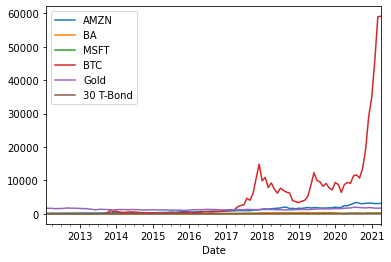

In [8]:
# Plot the data trends of the two variables over time
stocks_df.plot()

In [14]:
# Calculate the correlation
correlation = stocks_df.corr()

# Display de correlation matrix
correlation

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
AMZN,1.000000,0.576007,0.983154,0.735486,0.524567,-0.691376
BA,0.576007,1.000000,0.522784,0.269741,-0.113441,-0.124258
MSFT,0.983154,0.522784,1.000000,0.776143,0.562743,-0.728569
BTC,0.735486,0.269741,0.776143,1.000000,0.645120,-0.392672
Gold,0.524567,-0.113441,0.562743,0.645120,1.000000,-0.615138
30 T-Bond,-0.691376,-0.124258,-0.728569,-0.392672,-0.615138,1.000000


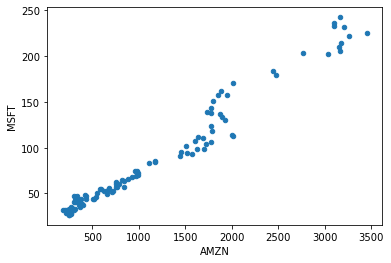

In [22]:
# Calculate and plot the correlation
correlation = stocks_df.corr()
correlation
stocks_df.plot(kind = "scatter", x="AMZN", y = "MSFT");

In [6]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([house_price_df, stocks_df], axis="columns", join="inner")
combined_df

,Median Sale Price,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,,
2012-02-29,297736.8421,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,300131.5789,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,311921.0526,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,324657.8947,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,318684.2105,228.35,74.30,30.59,NaN,1604.2,2.76
...,...,...,...,...,...,...,...
2020-09-30,681763.1579,3148.73,165.26,210.33,10741.58,1887.5,1.46
2020-10-31,686368.4211,3036.15,144.39,202.47,13573.71,1877.4,1.65
2020-11-30,701684.2105,3168.04,210.71,214.07,19382.36,1780.9,1.58


In [31]:
combined_df.corr()['Median Sale Price'].to_frame().iloc[1:]

,Median Sale Price
AMZN,0.925388
BA,0.731449
MSFT,0.900481
BTC,0.781356
Gold,0.212930
30 T-Bond,-0.615141


<AxesSubplot:xlabel='Date'>

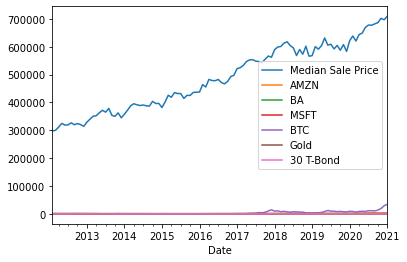

In [7]:
# Plot the data trends of the two variables over time
combined_df.plot()

<AxesSubplot:xlabel='MSFT', ylabel='Median Sale Price'>

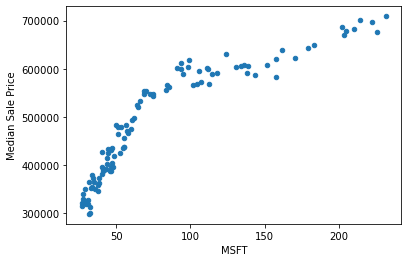

In [25]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='MSFT', y='Median Sale Price')